### Import libraries.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

### Read in the data.

In [2]:
df = pd.read_csv('../data/selected_data.csv')

In [135]:
leave = pd.read_csv('../data/parental_leave_oecd.csv')

### Set max number of columns and rows.

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
df.head()

,country_name,country_code,indicator_code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,AFG,PCT.ENG.STM.THR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,SL.TLF.ACTI.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.709999,80.655998,80.571999,80.462997,80.325996,80.156998,80.140999,80.146004,80.161003,80.179001,80.203003,80.255997,80.331001,80.426003,80.540001,80.662003,80.647003,80.621002,80.566002,80.466003,80.318001,80.221001,80.132004,79.433998,78.738998,78.047997,77.333000,76.581001,76.582001,76.541000
2,Afghanistan,AFG,SL.TLF.CACT.MA.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.779999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.036201,NaN,NaN,NaN,77.046997,NaN,77.076797,NaN,NaN,73.163597,NaN,NaN
3,Afghanistan,AFG,SL.TLF.CACT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.823997,78.761002,78.662003,78.531998,78.369003,78.162003,78.150002,78.168999,78.205002,78.250999,78.306999,78.382004,78.473000,78.580002,78.697998,78.820000,78.778999,78.731003,78.660004,78.551003,78.401001,78.302002,78.208000,77.535004,76.864998,76.197998,75.483002,74.735001,74.707001,74.657997
4,Afghanistan,AFG,SL.TLF.ACTI.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.662000,15.737000,15.783000,15.771000,15.747000,15.781000,15.582000,15.399000,15.270000,15.193000,15.145000,15.338000,15.592000,15.862000,16.118999,16.358999,16.079000,15.806000,15.587000,15.467000,15.469000,15.898000,16.441999,17.424000,18.459999,19.552000,20.704000,21.910000,22.377001,22.566999


### Which indicators offer the most data for year 2018, which is the year we have detail family leave policy data.

In [192]:
df.groupby(by=['indicator_code'])[['country_name', '2018']].count().sort_values(by='2018', ascending=False).head()

,country_name,2018
indicator_code,,
SP.DYN.IMRT.FE.IN,422,384
SP.DYN.IMRT.MA.IN,422,384
SH.IMM.MEAS,422,384
SH.IMM.IDPT,422,384
SP.POP.TOTL,211,210


### Build data for modeling.

In [329]:
indicator = ['SP.DYN.IMRT.FE.IN', 'SP.DYN.IMRT.MA.IN', 'SH.IMM.MEAS', 'SH.IMM.IDPT']
values_2018 = df[df['indicator_code'] == indicator[0]][['country_name', '2018']]

In [330]:
values_2018.rename(columns={'2018' : 'value_2018'}, inplace=True)
values_2018.drop_duplicates(inplace=True)
values_2018.dropna(inplace=True)
values_2018.reset_index(drop=True, inplace=True)
values_2018.shape

(192, 2)

In [331]:
values_2018.head()

,country_name,value_2018
0,Afghanistan,44.6
1,Albania,7.6
2,Algeria,19.0
3,Andorra,2.7
4,Angola,46.3


In [332]:
set_difference = set(leave['country_name'].values) - set(values_2018['country_name'].values)
list_difference = list(set_difference)
list_difference

['Korea']

In [333]:
leave.replace('United States', 'United States of America', inplace=True)

In [334]:
data = pd.merge(leave, values_2018, left_on='country_name', right_on='country_name', how='inner')

In [335]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 40
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country_name          41 non-null     object 
 1   ppl_weeks             41 non-null     float64
 2   ppl_avg_pay_rate      41 non-null     float64
 3   ppl_full_equiv_weeks  41 non-null     float64
 4   p_hcl_weeks           41 non-null     float64
 5   p_hcl_avg_pr          41 non-null     float64
 6   p_hcl_fe_wk           41 non-null     float64
 7   p_tpl_wk              41 non-null     float64
 8   p_tpl_avg_pr          41 non-null     object 
 9   p_tpl_fe_wk           41 non-null     object 
 10  pml_weeks             41 non-null     float64
 11  pml_avg_pay_rate      41 non-null     float64
 12  pml_full_equiv_weeks  41 non-null     float64
 13  m_hcl_weeks           41 non-null     float64
 14  m_hcl_avg_pr          41 non-null     float64
 15  m_hcl_fe_wk           41 

In [336]:
data.replace('-', 0, inplace=True)
data['p_tpl_avg_pr'] = data['p_tpl_avg_pr'].map(lambda x: float(x))
data['p_tpl_fe_wk'] = data['p_tpl_fe_wk'].map(lambda x: float(x))

In [337]:
data.head()

,country_name,ppl_weeks,ppl_avg_pay_rate,ppl_full_equiv_weeks,p_hcl_weeks,p_hcl_avg_pr,p_hcl_fe_wk,p_tpl_wk,p_tpl_avg_pr,p_tpl_fe_wk,pml_weeks,pml_avg_pay_rate,pml_full_equiv_weeks,m_hcl_weeks,m_hcl_avg_pr,m_hcl_fe_wk,m_tpl_wk,m_tpl_avg_pr,m_tpl_fe_wk,value_2018
0,Australia,2.0,42.9,0.9,0.0,0.0,0.0,2.0,42.9,0.9,18.0,42.9,7.7,0.0,0.0,0.0,18.0,42.9,7.7,2.8
1,Austria,0.0,0.0,0.0,8.7,75.8,6.6,8.7,75.8,6.6,16.0,100.0,16.0,44.0,75.8,33.4,60.0,82.3,49.4,2.6
2,Belgium,2.0,73.0,1.5,17.3,20.3,3.5,19.3,25.7,5.0,15.0,63.7,9.6,17.3,20.3,3.5,32.3,40.4,13.1,2.5
3,Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,49.9,8.0,35.0,53.2,18.6,51.0,52.1,26.6,4.0
4,Chile,1.0,100.0,1.0,0.0,0.0,0.0,1.0,100.0,1.0,18.0,100.0,18.0,12.0,100.0,12.0,30.0,100.0,30.0,5.6


### View correlation between target and feature variables.

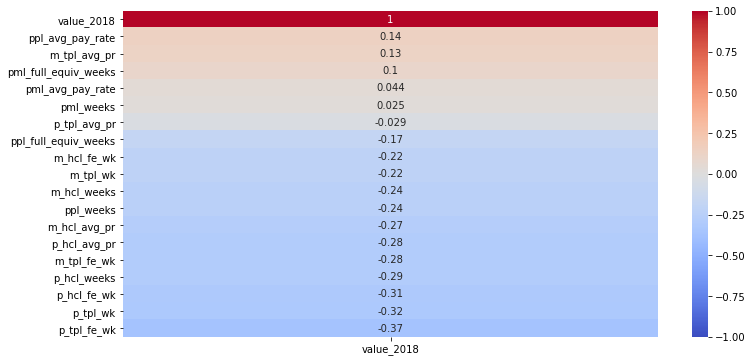

In [338]:
plt.figure (figsize=(12,6))
sns.heatmap(data.corr()[['value_2018']].sort_values('value_2018', ascending=False),
            vmax=1, vmin=-1, cmap='coolwarm', annot=True);

### Functions to calculate metrics and scores for the model.

In [339]:
def calc_metrics(true, pred):
    return print ('RMSE '+ str(np.sqrt(metrics.mean_squared_error(true, pred))) + '\n' +
                  'MSE  ' + str(metrics.mean_squared_error (true, pred)) + '\n' +
                  'R2   ' + str(metrics.r2_score (true, pred)) + '\n' +
                  'MAE  ' + str(metrics.mean_absolute_error(true, pred)))

def calc_scores(model, X_train, y_train, X_test, y_test):
    return print ('Train score  ' + str(model.score (X_train, y_train))  + '\n' +
                  'Test score   ' + str(model.score (X_test, y_test)) + '\n' +
                  'Baseline     ' + str(cross_val_score (model, X_train, y_train).mean()))

### Features and Target.

In [340]:
data.columns

Index(['country_name', 'ppl_weeks', 'ppl_avg_pay_rate', 'ppl_full_equiv_weeks',
       'p_hcl_weeks', 'p_hcl_avg_pr', 'p_hcl_fe_wk', 'p_tpl_wk',
       'p_tpl_avg_pr', 'p_tpl_fe_wk', 'pml_weeks', 'pml_avg_pay_rate',
       'pml_full_equiv_weeks', 'm_hcl_weeks', 'm_hcl_avg_pr', 'm_hcl_fe_wk',
       'm_tpl_wk', 'm_tpl_avg_pr', 'm_tpl_fe_wk', 'value_2018'],
      dtype='object')

In [341]:
features1 = ['pml_weeks', 'pml_avg_pay_rate',
             'pml_full_equiv_weeks', 'm_hcl_weeks', 'm_hcl_avg_pr', 'm_hcl_fe_wk',
             'm_tpl_wk', 'm_tpl_avg_pr', 'm_tpl_fe_wk']
features = ['pml_weeks', 'pml_avg_pay_rate',
            'pml_full_equiv_weeks', 'm_hcl_weeks', 'm_hcl_avg_pr', 'm_hcl_fe_wk']
target = 'value_2018'

In [342]:
X = data[features]

In [343]:
y = data[target]

In [344]:
X.shape, y.shape

((41, 6), (41,))

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [346]:
model = LinearRegression()

In [347]:
model.fit(X_train, y_train)

LinearRegression()

In [348]:
y_preds = model.predict(X_test)

In [349]:
resids = pd.DataFrame(columns=['true', 'predicted'])

In [350]:
resids['true'] = y_test
resids['predicted'] = y_preds
resids['resids'] = y_test - y_preds

In [351]:
resids

,true,predicted,resids
40,5.6,1.288044,4.311956
37,3.7,4.638988,-0.938988
10,3.0,3.025270,-0.025270
23,3.7,4.222090,-0.522090
26,2.7,3.174318,-0.474318
31,3.3,4.429031,-1.129031
17,1.8,2.803000,-1.003000
16,2.5,4.061873,-1.561873
25,3.5,3.532124,-0.032124
13,1.5,3.326006,-1.826006


In [352]:
calc_metrics(y_test, y_preds)

RMSE 1.6161156581137364
MSE  2.6118298204003954
R2   -1.3726081701835429
MAE  1.1511250916559173


In [353]:
calc_scores(model, X_train, y_train, X_test, y_test)

Train score  0.2217370187922929
Test score   -1.3726081701835429
Baseline     -3.249661790936785


In [354]:
pd.DataFrame(list(zip(X.columns, model.coef_)), columns=['coef_name', 'coef_value'])

,coef_name,coef_value
0,pml_weeks,-0.080862
1,pml_avg_pay_rate,-0.007809
2,pml_full_equiv_weeks,0.129621
3,m_hcl_weeks,-0.007640
4,m_hcl_avg_pr,-0.013209
5,m_hcl_fe_wk,-0.022236
